In [1]:
import json
from texttable import Texttable
import latextable
from tabulate import tabulate
import sys
file_directory = "../"
sys.path.append(file_directory)
from generateDataset import generateDatasetFromResults
from metric import calculatePercentageReductionSeries 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [2]:
typeIndexLdpPathResult = "../results/standard/type_index_ldp_result.json"
typeIndexLdpPathSummary = "../results/standard/summary_type_index_ldp_result.json"
typeIndexLdpDataset = generateDatasetFromResults(typeIndexLdpPathResult, typeIndexLdpPathSummary, "typeIndexLdp")

In [3]:
shapeIndexPathResult = "../results/standard/shape_index_result.json"
shapeIndexPathSummary = "../results/standard/summary_shape_index_result.json"
shapeIndexDataset = generateDatasetFromResults(shapeIndexPathResult, shapeIndexPathSummary, "shapeIndex")

In [4]:
shapeIndex20PathResult = "../results/shape-index-20-percent/shape_index_result.json"
shapeIndex20PathSummary = "../results/shape-index-20-percent/summary_shape_index_result.json"
shapeIndex20Dataset = generateDatasetFromResults(shapeIndex20PathResult, shapeIndex20PathSummary, "shapeIndex20Percent")

In [5]:
shapeIndex50PathResult = "../results/shape-index-50-percent/shape_index_result.json"
shapeIndex50PathSummary = "../results/shape-index-50-percent/summary_shape_index_result.json"
shapeIndex50Dataset = generateDatasetFromResults(shapeIndex50PathResult, shapeIndex50PathSummary, "shapeIndex50Percent")

In [6]:
shapeIndex80PathResult = "../results/shape-index-80-percent/shape_index_result.json"
shapeIndex80PathSummary = "../results/shape-index-80-percent/summary_shape_index_result.json"
shapeIndex80Dataset = generateDatasetFromResults(shapeIndex80PathResult, shapeIndex80PathSummary, "shapeIndex80Percent")

In [7]:
shapeIndexInnerPathResult = "../results/shape-inner/shape_index_result.json"
shapeIndexInnerPathSummary = "../results/shape-inner/summary_shape_index_result.json"
shapeIndexInnerDataset = generateDatasetFromResults(shapeIndexInnerPathResult, shapeIndexInnerPathSummary, "shapeInner")

In [8]:
shapeIndexMinimalPathResult = "../results/shape-minimal/shape_index_result.json"
shapeIndexMinimalPathSummary = "../results/shape-minimal/summary_shape_index_result.json"
shapeIndexMinimalDataset = generateDatasetFromResults(shapeIndexMinimalPathResult, shapeIndexMinimalPathSummary, "shapeMinimal")

In [9]:
evalInstances = [shapeIndexDataset, shapeIndex20Dataset, shapeIndex50Dataset, shapeIndex80Dataset, shapeIndexInnerDataset, shapeIndexMinimalDataset]

In [10]:
def aggregateReduction(reductionDataset, globalAggregation, aggregationByQuery):
    for query, versions in reductionDataset.items():
        if query not in aggregationByQuery:
            aggregationByQuery[query] = {}
        for i, reduction in enumerate(versions):
            if "v{}".format(i) not in aggregationByQuery[query]:
                aggregationByQuery[query]["v{}".format(i)] = []
            if reduction is not None:
                globalAggregation.append(reduction)
                aggregationByQuery[query]["v{}".format(i)].append(reduction)


In [11]:
generalReductionHttpRequest = []
generalReductionExec = []

reductionHttpRequestByQuery = {}
reductionExecRequestByQuery = {}

for instance in evalInstances:
    currentReductionHttpRequest = calculatePercentageReductionSeries(instance.numberHttpRequest, typeIndexLdpDataset.numberHttpRequest)
    currentReductionExec = calculatePercentageReductionSeries(instance.meanExecutionTime, typeIndexLdpDataset.meanExecutionTime)
    
    aggregateReduction(currentReductionHttpRequest, generalReductionHttpRequest, reductionHttpRequestByQuery)
    aggregateReduction(currentReductionExec, generalReductionExec, reductionExecRequestByQuery)
 

In [12]:
reductionHttpRequestByQuery

{'interactive-discover-1': {'v0': [0.6492537313432836,
   0.9477611940298507,
   0.6492537313432836,
   0.6492537313432836,
   0.6044776119402985,
   0.5746268656716418],
  'v1': [0.6923076923076923,
   0.7307692307692307,
   0.6923076923076923,
   0.6923076923076923,
   0.46153846153846156,
   0.3076923076923077],
  'v2': [0.782608695652174,
   0.6956521739130435,
   0.782608695652174,
   0.782608695652174,
   0.5217391304347826,
   0.34782608695652173],
  'v3': [0.14347826086956522,
   0.9695652173913043,
   0.14347826086956522,
   0.14347826086956522,
   0.11739130434782609,
   0.1],
  'v4': [0.5813953488372093,
   0.9457364341085271,
   0.5813953488372093,
   0.5813953488372093,
   0.5348837209302325,
   0.5038759689922481]},
 'interactive-discover-2': {'v0': [0.9477611940298507,
   0.9477611940298507,
   0.9477611940298507,
   0.9477611940298507,
   0.9029850746268657,
   0.8731343283582089],
  'v1': [0.7307692307692307,
   0.7307692307692307,
   0.7307692307692307,
   0.730769230

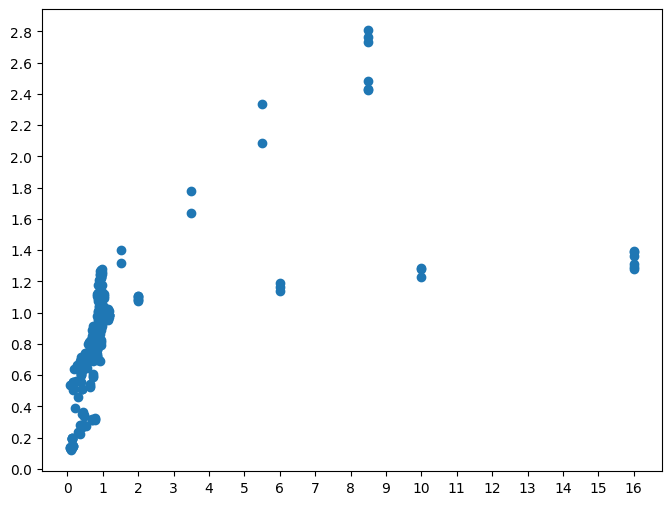

In [30]:
x = np.array(generalReductionHttpRequest)
y = np.array(generalReductionExec)

b, a = np.polyfit(x, y, deg=1)

indexes = np.linspace(-1500, 100, 10)

fig, ax = plt.subplots(figsize=(8, 6))
ax.xaxis.set_major_locator(MultipleLocator(1))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(0.2)) # Set major ticks every 20 units on y-axis

ax.scatter(x, y)

In [14]:
def dividePoints(x, y, threshold):
    x_right = []
    y_right = []

    x_left = []
    y_left = []
    
    for i, val in enumerate(x):
        if val>threshold:
            x_right.append(val)
            y_right.append(y[i])
        else:
            x_left.append(val)
            y_left.append(y[i])
    return ((x_right, y_right), (x_left,y_left))

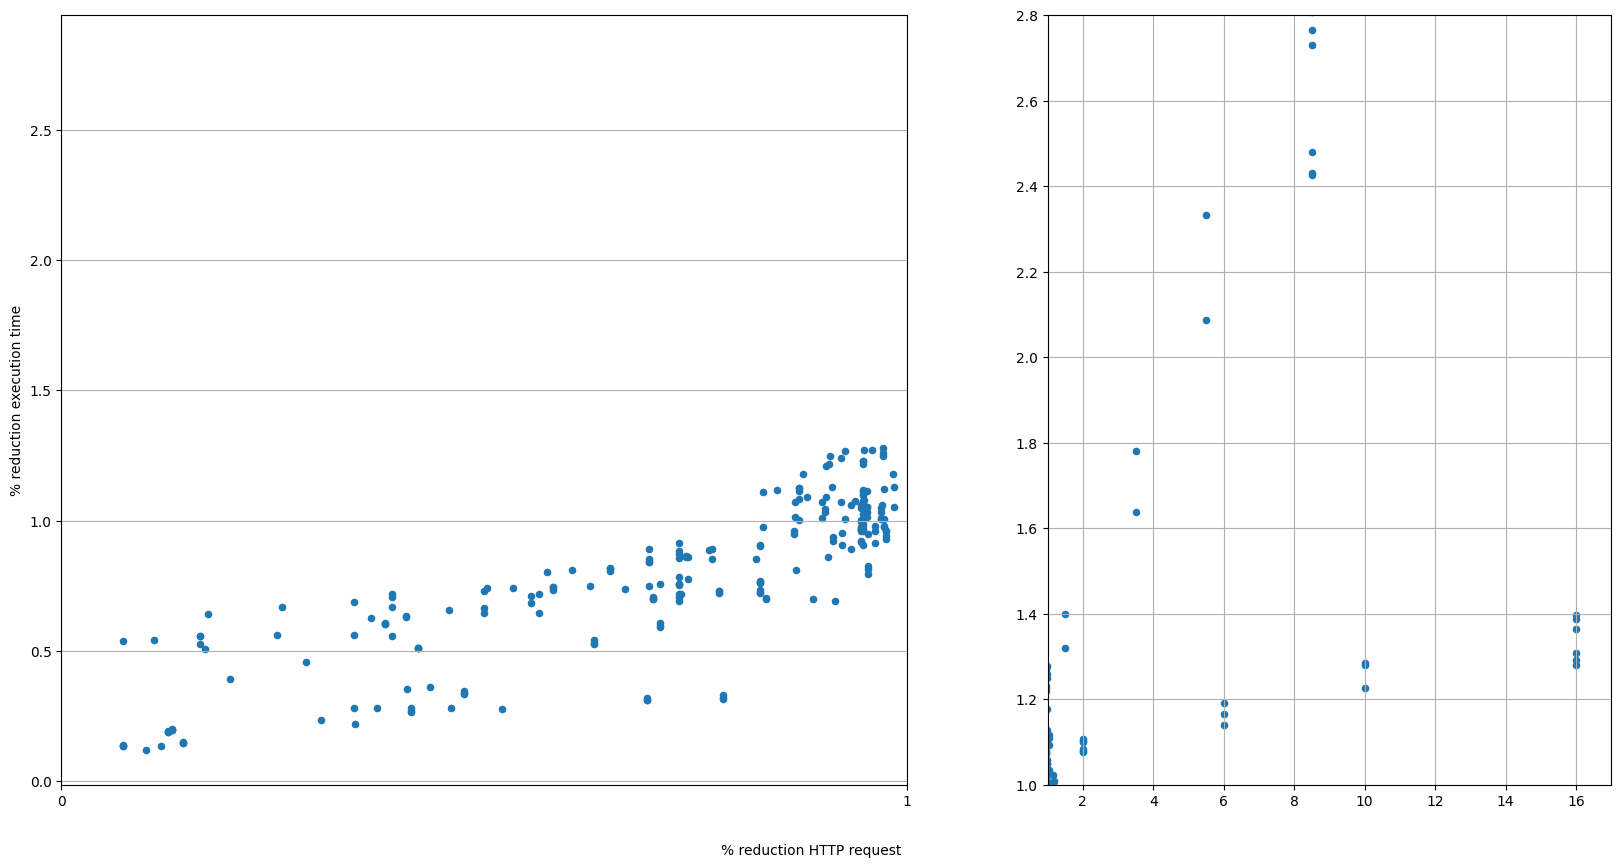

In [50]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10), width_ratios=[1.5, 1])  # Control width with ratios

ax1.grid(axis="both")
ax2.grid(axis="both")

# Plot the data on both subplots
s=20
ax1.scatter(x, y, s=s)
ax2.scatter(x, y, s=s)

# Set x-axis limits to create the cut
ax1.set_xlim(0, 1)  # Left side of the cut
ax2.set_ylim(0, 1.5) 

ax1.xaxis.set_major_locator(MultipleLocator(1))  # Set major ticks every 5 units on x-axis
ax1.yaxis.set_major_locator(MultipleLocator(0.5)) # Set major ticks every 20 units on y-axis

ax2.set_xlim(1, 17)       # Right side of the cut
ax2.set_ylim(1, 2.8) 
#ax2.xaxis.set_major_locator(MultipleLocator(25))  # Set major ticks every 5 units on x-axis
#ax2.yaxis.set_major_locator(MultipleLocator(20)) # Set major ticks every 20 units on y-axis

# Labels and titles
fig.text(0.5, 0.04, '% reduction HTTP request', ha='center')
ax1.set_ylabel('% reduction execution time')

plt.show()

In [54]:
corr, _ = pearsonr(x,y)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.552854325112012


In [55]:
x = np.array(generalReductionHttpRequest)
y = np.array(generalReductionExec)

((x_right, y_right), (x_left,y_left)) = dividePoints(x,y, 1)

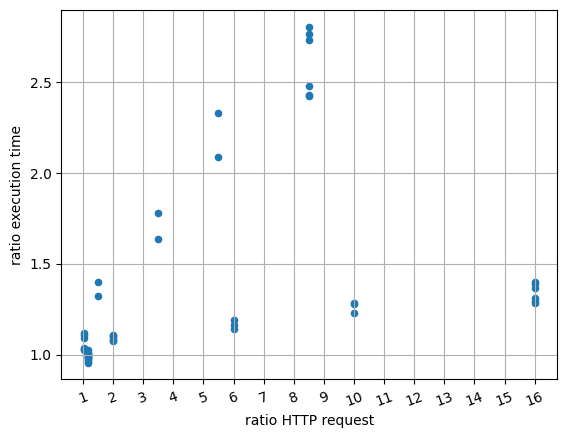

In [64]:
# Create a figure with two subplots
fig, ax = plt.subplots()  # Control width with ratios

ax.grid(axis="both")

# Plot the data on both subplots
s=20
ax.scatter(x_right, y_right, s=s)

# Set x-axis limits to create the cut

#ax.set_xlim(-150, 150)       # Right side of the cut
ax.xaxis.set_major_locator(MultipleLocator(1))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(0.5)) # Set major ticks every 20 units on y-axis
ax.tick_params(axis='x', rotation=20)

# Labels and titles
ax.set_xlabel('ratio HTTP request')
ax.set_ylabel('ratio execution time')

plt.show()

In [61]:
corr, _ = pearsonr(x_right,y_right)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.39137913690843706


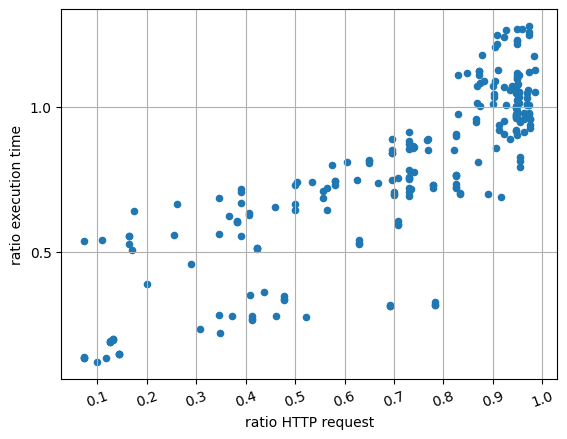

In [63]:
# Create a figure with two subplots
fig, ax = plt.subplots()  # Control width with ratios

ax.grid(axis="both")

# Plot the data on both subplots
s=20
ax.scatter(x_left, y_left, s=s)

# Set x-axis limits to create the cut

#ax.set_xlim(-1750, -300)  # Left side of the cut

ax.xaxis.set_major_locator(MultipleLocator(0.1))  # Set major ticks every 5 units on x-axis
ax.yaxis.set_major_locator(MultipleLocator(0.5)) # Set major ticks every 20 units on y-axis
ax.tick_params(axis='x', rotation=20)

# Labels and titles
ax.set_xlabel('ratio HTTP request')
ax.set_ylabel('ratio execution time')

plt.show()

In [59]:
corr, _ = pearsonr(x_left,y_left)
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 0.8405024715145422
